## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. ~~Load the data. Perform some EDA, summarizing the target label and the features.~~
2. ~~Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)~~
3. ~~Build a $k$-NN classifier. Explain how you select $k$.~~
4. ~~Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?~~
5. ~~Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.~~

#### part one 

In [2]:
# this question. i want to do this one. 
mines_data = pd.read_csv("./data/knn/land_mines.csv")

# let's take a look at the head of our data. 
mines_data.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [3]:
# any way to look at summary statistics? 
mines_data.describe()
# this doesn't really mean anything to me unless i look at the distribution...
# ...of the data
# also, mine_type is a categorical variable - doesn't fit in with the rest 
# ...of these and summary statistics like this probably aren't helpful 

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


[Text(0.5, 1.0, 'distribution of mine-types')]

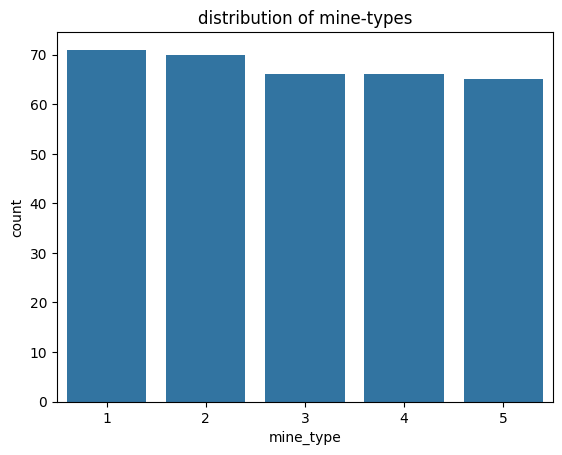

In [4]:
# wouldn't hurt to look at the distribution of our mine types
sns.countplot(x=mines_data["mine_type"]).set(title="distribution of mine-types")
# all mine types seem about equally represented in the data 

[Text(0.5, 1.0, 'Grouped KDE Plot')]

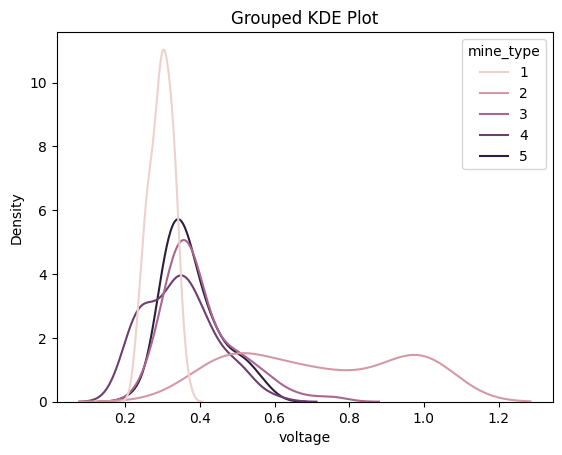

In [5]:
# i'm a little interested in looking at voltage distribution...
# ...stratified by mine type 
sns.kdeplot(data=mines_data, x='voltage', hue='mine_type', common_norm=False).set(title='Grouped KDE Plot')
# our voltage values are below one so that's probably why our density is...
# ...looking a little weird

There is considerable overlap in the voltages of the mine types; however, mine type 1 is the most likely to have a smaller voltage. 
Mine type 2 can have anything from a fairly small voltage to a very high voltage, and the density is about the same for low and nigh voltages. 
Therefore, mine type 2 is direly unpredictable perhaps! You never know whether you will get something extremely dangerous or something tame enough to deal with reasonably. 

[Text(0.5, 1.0, 'Grouped KDE Plot')]

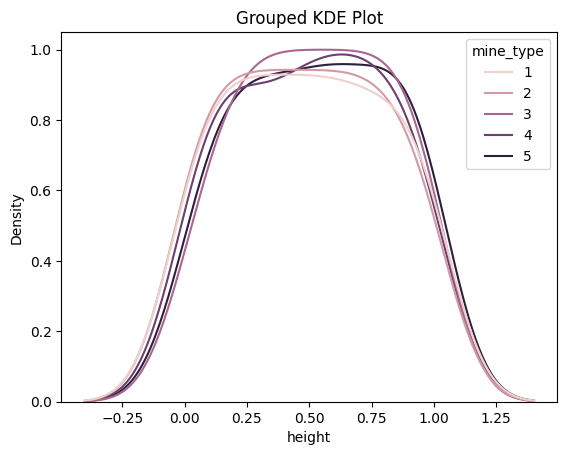

In [6]:
# we could also look at height stratified by mine type. 
sns.kdeplot(data=mines_data, x='height', hue='mine_type', common_norm=False).set(title='Grouped KDE Plot')
# seems like height distribution isn't all that different across mine types. 

yeah hell naw how does the DOD expect us to work with *this*

[Text(0.5, 1.0, 'Grouped KDE Plot')]

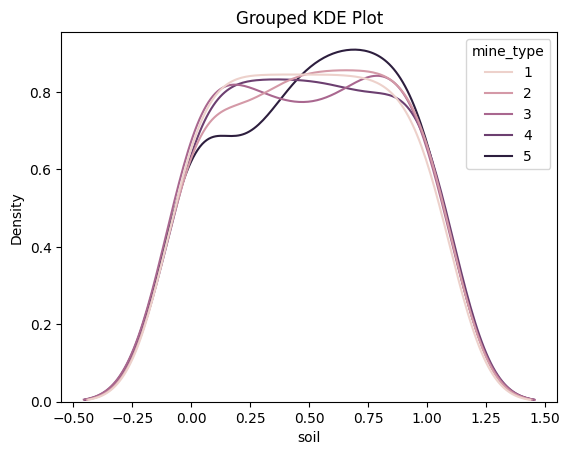

In [7]:
# what about soil? 
sns.kdeplot(data=mines_data, x='soil', hue='mine_type', common_norm=False).set(title='Grouped KDE Plot')
# distribution is roughly even...

...Well, it's even save for mine type 5, which has a non-negligible...uh...either local minimum or inflection point around 0.25 and a pretty high maximum around 0.75. 

<Axes: xlabel='voltage', ylabel='height'>

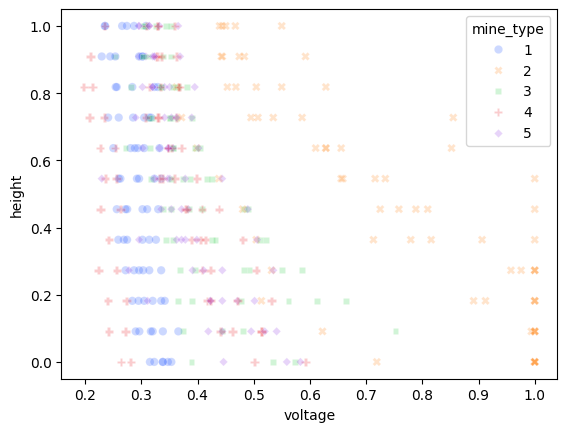

In [8]:
# something else i'm interested in looking at is...
# can we see how voltage correpsonds to height corresponds to type?!
sns.scatterplot(data=mines_data, x="voltage", y="height", hue="mine_type", style="mine_type", palette="bright", alpha=0.2)

I genuinely do not know what to pull from this.
High heights seem correlated with lower voltages and vice versa...
Height is negatively correlated with voltage. 

<Axes: xlabel='voltage', ylabel='soil'>

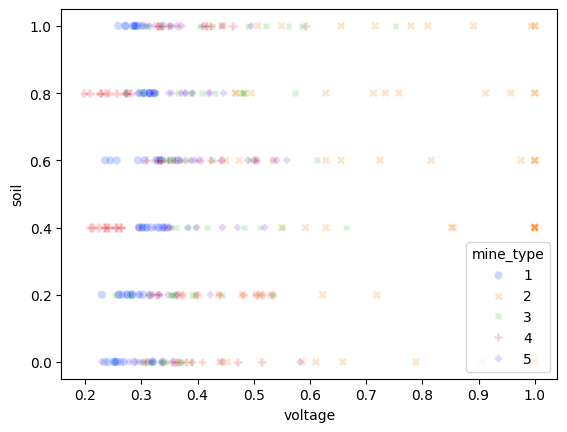

In [9]:
# what about soil vs. voltage? 
sns.scatterplot(data=mines_data, x="voltage", y="soil", hue="mine_type", style="mine_type", palette="bright", alpha=0.2)

This scatterplot doesn't tell us much either, but at least we can tell that voltages are concentrated at lower values, with mines of type 2 having higher values. 

#### part two

In [10]:
# need to define the maxmin function that we can...
# apply to our feature matrix. 
# we want to normalise the data
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [11]:
# testing 123
print(mines_data['height'])
print(maxmin(mines_data['height']))
# ah they're the same huh thats weird ok 
# *edit: they were only roughly the same. 

0      0.000000
1      0.181818
2      0.272727
3      0.454545
4      0.545455
         ...   
333    0.909091
334    0.181818
335    0.454545
336    0.727273
337    1.000000
Name: height, Length: 338, dtype: float64
0      0.000000
1      0.181818
2      0.272727
3      0.454545
4      0.545455
         ...   
333    0.909091
334    0.181818
335    0.454545
336    0.727273
337    1.000000
Name: height, Length: 338, dtype: float64


In [12]:
# normalisation of our data
# our target variable is the mine type. 
y = mines_data['mine_type'] # Create target variable vector
X = mines_data.loc[:,['voltage','height','soil']] # Create feature matrix
ex = X.apply(maxmin) # maxmin normalisation. 

# let's see if that worked
print(X.head())
print(ex.head())
print(X.describe())
print(ex.describe())

    voltage    height  soil
0  0.338157  0.000000   0.0
1  0.320241  0.181818   0.0
2  0.287009  0.272727   0.0
3  0.256284  0.454545   0.0
4  0.262840  0.545455   0.0
    voltage    height  soil
0  0.175033  0.000000   0.0
1  0.152702  0.181818   0.0
2  0.111279  0.272727   0.0
3  0.072981  0.454545   0.0
4  0.081152  0.545455   0.0
          voltage      height        soil
count  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550
std      0.195819    0.306043    0.344244
min      0.197734    0.000000    0.000000
25%      0.309737    0.272727    0.200000
50%      0.359516    0.545455    0.600000
75%      0.482628    0.727273    0.800000
max      0.999999    1.000000    1.000000
          voltage      height        soil
count  338.000000  338.000000  338.000000
mean     0.290304    0.508876    0.503550
std      0.244083    0.306043    0.344244
min      0.000000    0.000000    0.000000
25%      0.139608    0.272727    0.200000
50%      0.201657    0.545455    0

In [13]:
# train-test splitting 
from sklearn.model_selection import train_test_split 
# we have a relatively small dataset, so our train/test split should be...
# ...fairly even. if we had a larger dataset, we might want a larger...
# ...training set. 

# the sklearn kit train-test split (something that we did in a project in our...
# ...math class, too.) 
X_train, X_test, y_train, y_test = train_test_split(ex,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 50 train/50 test
                                                    random_state=100) # For replication purposes

#### part three

In [14]:
# build knn classifier and explain how i choose k 
# we need this thing. 
from sklearn.neighbors import KNeighborsClassifier 
# we want classification because we are trying to classify by a categorical...
# ...variable instead of regressing. 

How can we choose what our 'k' should be? 
Will we ever be overfitting or underfitting the data? 
How can we see we will be underfitting or overfitting the data?
- -> probably with some sort of other dataviz, the example included a big graph that allows us to view general patterns. 

In [15]:
# 'k' is a measure of the number of nearest neighbours.
# larger k = greater prediction boundary. bigger blobs of data. 
# we were informed that the rule-of-thumb for calculating k is k=N^(1/2). 
# we can just start with this
k = (len(X_train))**(1/2)
k

13.0

[2]


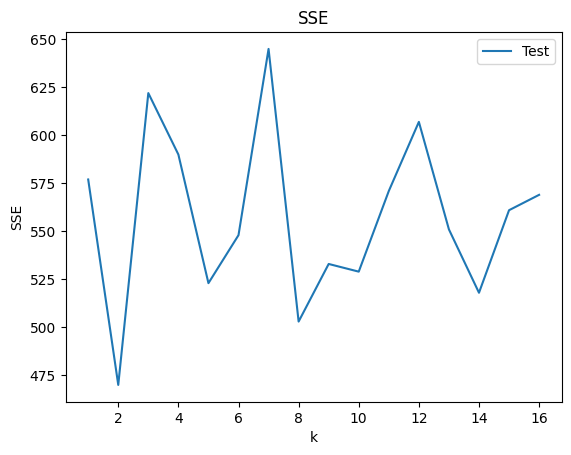

In [16]:
# re-choosing k using SSE
# modified version of code provided in codebook. 

# the thing about our data is that our test size is TOTALLY different. 
# we probably should bear this in mind when assessing our results and...
# ...if we get k values that WE think are strange or graphs that we think...
# ...are strange

k_bar=16

SSE = [] # We'll store the SSE here 
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) 
    fitted_model = model.fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test) 
    SSE.append(np.sum( (y_test-y_hat)**2 ))

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1 
print(k_star)
plt.plot(np.arange(1,k_bar+1),SSE,label='Test')

plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# my SSEs are increasing (very strange behaviour, especially considering it...
# ...seems inconsistent with the graphs i printed in my previous step...)

# but this is what we got

k = 4 sounds like our best bet, because that's where the SSE fares the best. after that, it's not even that we have diminishing return after our ideal k...our SSE actually *increases.*

Dunno why it differs so strongly from the example in class. 
Maybe because the length of the data is so much shorter and our split is different.
Maybe because our mine types don't follow a very logical pattern in their voltages and soil type, too. 

#### part four

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
# creating our confusion matrix
model = KNeighborsClassifier(n_neighbors=4) 
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix
# this is NOT very reassuring we have some very similar numbers and very...
# ...small numbers across this table

array([[22,  1,  6,  5,  4],
       [ 0, 23,  6,  2,  4],
       [ 5,  0, 10,  5, 13],
       [12,  2, 11,  8,  2],
       [ 9,  0, 13,  4,  2]])

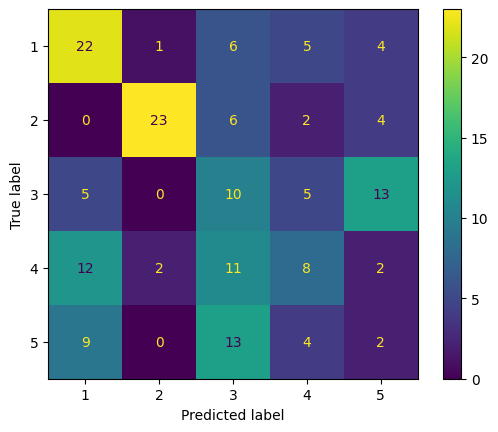

In [19]:
# let's see
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3, 4, 5])

cm_display.plot()
plt.show()
# really only fared well for mine type 2 and MAYBE mine type 1. 
# everything else seems to have been sorted very poorly, and predicting a mine...
# ...type based on its attributes is often no better than flipping a coin. 
# while betting on your life. 

#### part five

If this predictive model was actually reliable, we would see a bright green or yellow streak across the diagonal of our heatmap: mines of type 1 would be sorted as mines of type 1, mines of type 2 would be identified as type 2s, and so on and so forth. Consistent patterns still appear in some of the mistakes that the model makes, so I'm inclined to advise people based on what true labels correspond with the predicted labels rather than the predicted labels themselves. If the model predicts type 1, for example, I'd tell my coworker that the mine could be type 1, but is also likely to be type 4, and *somewhat* likely to be type 3 or 5. The mistakes the model makes when predicting types 4 and 5 are unfortunately not nearly as consistent, so I would tell my coworker to exercise maximum caution with such predictions because they would be no more reliable than guessing. 

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. ~~Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.~~
2. ~~Make a correlation matrix. What variables are strongly associated with a death event?~~
3. ~~For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?~~
4. ~~On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.~~
5. ~~Maxmin normalize all of the variables in `X`.~~
6. ~~Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).~~
7. ~~Determine the optimal number of neighbors~~ ~~for a $k$NN regression for the variables you selected.~~
8. ~~OK, do steps 5 through 7 again, but use all of the variables (except `time`).~~ ~~Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.~~

#### part one 

In [20]:
# loading data 
hf_records = pd.read_csv("./data/knn/heart_failure_clinical_records_dataset.csv")
hf_records.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
# we will not be using time. 
hf_records = hf_records.drop(columns="time")
hf_records.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [22]:
# handling NAs 
# resource: https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/
hf_records.isnull().sum()
# no TRUE values to the answer to our 'is it null?' query means there...
# ...are no NAs that we have to deal with 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

#### part two 

In [23]:
# correlation matrix for death event 
hf_records.corr().tail(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
DEATH_EVENT,0.253729,0.06627,0.062728,-0.001943,-0.268603,0.079351,-0.049139,0.294278,-0.195204,-0.004316,-0.012623,1.0


The following factors are most strongly correlated with the death event: 
- serum_creatinine (correlation coefficient of 0.303)
- ejection_fraction (correlation coefficient of -0.275. note that the correlation is negative)
- age (correlation coefficient of 0.221)

- the death event(correlation coefficient of 1) (I am very clever)

#### part three

In [24]:
# all the variables asked for in this question are booleans or binary. 
# the p values that we see in our summary table denote the proportion of people...
# ...who died given certain health conditions or demographic characteristics.

# summary table - diabetes
hf_records[["diabetes", "DEATH_EVENT"]].groupby(hf_records["diabetes"]).describe()

diabetes                                    DEATH_EVENT            \
            count mean  std  min  25%  50%  75%  max       count      mean   
diabetes                                                                     
0           174.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       174.0  0.321839   
1           125.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       125.0  0.320000   

                                             
               std  min  25%  50%  75%  max  
diabetes                                     
0         0.468530  0.0  0.0  0.0  1.0  1.0  
1         0.468353  0.0  0.0  0.0  1.0  1.0

In [25]:
# summary table - anaemia
hf_records[["anaemia", "DEATH_EVENT"]].groupby(hf_records["anaemia"]).describe()

anaemia                                    DEATH_EVENT            \
          count mean  std  min  25%  50%  75%  max       count      mean   
anaemia                                                                    
0         170.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       170.0  0.294118   
1         129.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       129.0  0.356589   

                                            
              std  min  25%  50%  75%  max  
anaemia                                     
0        0.456991  0.0  0.0  0.0  1.0  1.0  
1        0.480859  0.0  0.0  0.0  1.0  1.0

In [26]:
# summary table - high blood pressure
hf_records[["high_blood_pressure", "DEATH_EVENT"]].groupby(hf_records["high_blood_pressure"]).describe()

high_blood_pressure                                     \
                                  count mean  std  min  25%  50%  75%  max   
high_blood_pressure                                                          
0                                 194.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                                 105.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

                    DEATH_EVENT                                               
                          count      mean       std  min  25%  50%  75%  max  
high_blood_pressure                                                           
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0  
1                         105.0  0.371429  0.485504  0.0  0.0  0.0  1.0  1.0

In [27]:
# summary table - sex
hf_records[["sex", "DEATH_EVENT"]].groupby(hf_records["sex"]).describe()

sex                                    DEATH_EVENT                      \
     count mean  std  min  25%  50%  75%  max       count      mean       std   
sex                                                                             
0    105.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       105.0  0.323810  0.470173   
1    194.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       194.0  0.319588  0.467523   

                              
     min  25%  50%  75%  max  
sex                           
0    0.0  0.0  0.0  1.0  1.0  
1    0.0  0.0  0.0  1.0  1.0

In [28]:
# summary table - smoking
hf_records[["smoking", "DEATH_EVENT"]].groupby(hf_records["smoking"]).describe()

smoking                                    DEATH_EVENT            \
          count mean  std  min  25%  50%  75%  max       count      mean   
smoking                                                                    
0         203.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       203.0  0.325123   
1          96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        96.0  0.312500   

                                            
              std  min  25%  50%  75%  max  
smoking                                     
0        0.469579  0.0  0.0  0.0  1.0  1.0  
1        0.465946  0.0  0.0  0.0  1.0  1.0

In order to determine the probability someone dies given they possess a certain characteristic, we must take the mean of DEATH_EVENT for each variable. 
One must bear in mind that the probabilities are not an indication that a given characteristic causes death. However, they might allow us to investigate a causal relationship.
The characteristics corresponding to greater proportions of death are: 
- high blood pressure (0.382979 vs. 0.201923)
- diabetes (0.316667 vs 0.219780)
- anaemia (0.312500 vs. 0.218391)

#### part four

In [29]:
# at this point it's wash rinse repeat - use iloc for our feature matrix, 
# and then make a y vector separately. 
X = hf_records.loc[:,["high_blood_pressure", "diabetes", "anaemia"]]
y = hf_records["DEATH_EVENT"]
X.head()
# testing 

,high_blood_pressure,diabetes,anaemia
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,1,1


#### part five 

In [30]:
# why do we have to maxmin normalise binary variables? 
X = X.apply(maxmin)
X.head()
# i dunno if it did anything
# it didn't. all the data already existed on the same scale so 

,high_blood_pressure,diabetes,anaemia
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,1.0


#### part six 

In [31]:
# split into train/test split 
from sklearn.model_selection import train_test_split

training_x, testing_x, training_y, testing_y = train_test_split(X, 
                                                                y, 
                                                                test_size=0.2,
                                                                random_state = 73468546)


#### part seven

In [32]:
from sklearn.neighbors import KNeighborsRegressor

[15]


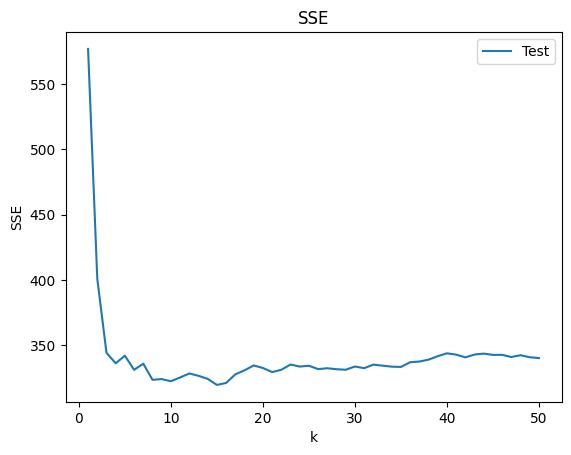

In [33]:
# optimal number of neighbours for knn regression
k_bar=50

SSE = [] 
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) 
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) 
    SSE.append(np.sum( (y_test-y_hat)**2 ))
    
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min) 
k_star = min_index[0]+1 
print(k_star)
plt.plot(np.arange(1,k_bar+1),SSE,label='Test') 

plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

##### my answer to this question is right here sorry it's a bit hidden
The optimal number of neighbours would be UHHHHH 23 of them I think. 

#### part eight

In [34]:
# what do we got
X1 = hf_records.iloc[:,:-1]
y1 = hf_records["DEATH_EVENT"]
X1.head() # checking if we did indeed drop DEATH_EVENT

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [35]:
# max-min-ing everything
X1 = X1.apply(maxmin)
X1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [36]:
# train-test-splitting everything 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                            test_size=0.2,
                                                            random_state = 73468546)

[12]


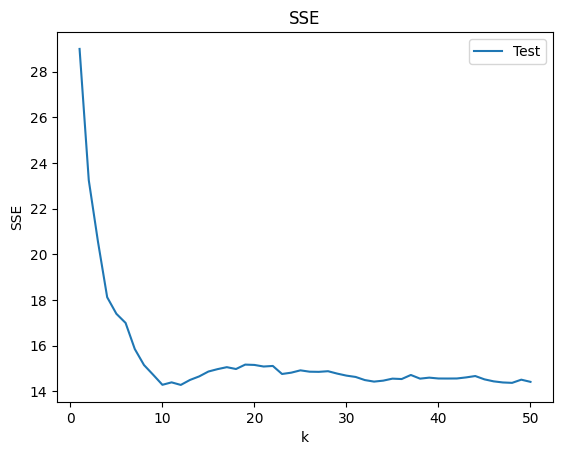

In [37]:
# running a kNN model 
k_bar=50
    
SSE = [] 
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) 
    fitted_model = model.fit(X1_train,y1_train) 
    y1_hat = fitted_model.predict(X1_test)
    SSE.append(np.sum( (y1_test-y1_hat)**2 ))

SSE_min = np.min(SSE) 
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1 
print(k_star)
plt.plot(np.arange(1,k_bar+1),SSE,label='Test')

plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

In [38]:
# what if we have less variables? 
X2 = hf_records.iloc[:,:-4]
y2 = hf_records["DEATH_EVENT"]
X2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine
0,75.0,0,582,0,20,1,265000.00,1.9
1,55.0,0,7861,0,38,0,263358.03,1.1
2,65.0,0,146,0,20,0,162000.00,1.3
3,50.0,1,111,0,20,0,210000.00,1.9
4,65.0,1,160,1,20,0,327000.00,2.7


In [39]:
# normalisation 
X2 = X2.apply(maxmin)
X2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191


In [40]:
# train test splitting
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                            test_size=0.2,
                                                            random_state = 73468546)

[50]


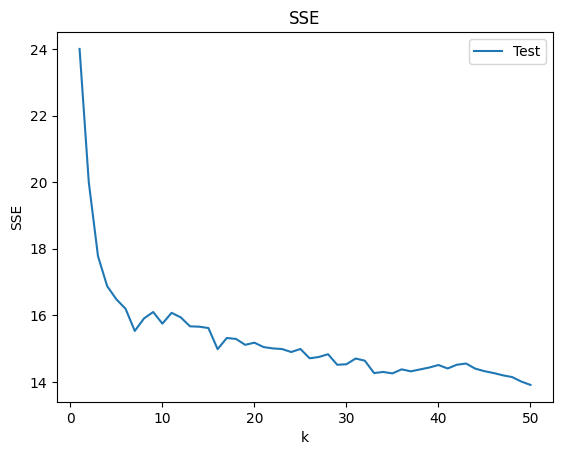

In [41]:
# kNN 
k_bar=50

SSE = [] # We'll store the SSE here 
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X2_train,y2_train) # Train the model on our data
    y2_hat = fitted_model.predict(X2_test) # Predict values for test set
    SSE.append(np.sum( (y2_test-y2_hat)**2 )) # Save the computed SSE for test set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)
plt.plot(np.arange(1,k_bar+1),SSE,label='Test') # Plot SSE by k

plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

In [42]:
# even less variables
X3 = hf_records.iloc[:,:-6]
y3 = hf_records["DEATH_EVENT"]
X3.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure
0,75.0,0,582,0,20,1
1,55.0,0,7861,0,38,0
2,65.0,0,146,0,20,0
3,50.0,1,111,0,20,0
4,65.0,1,160,1,20,0


In [43]:
# normalisation 
X3 = X3.apply(maxmin)
X3.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure
0,0.636364,0.0,0.071319,0.0,0.090909,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0


In [44]:
# train-test-splitting everything 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, 
                                                            test_size=0.2,
                                                            random_state = 73468546)

[50]


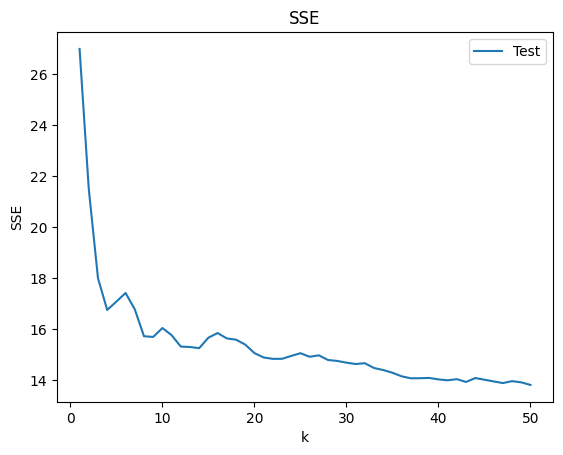

In [45]:
# kNN 
k_bar=50

SSE = [] # We'll store the SSE here 
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X3_train,y3_train) # Train the model on our data
    y3_hat = fitted_model.predict(X3_test) # Predict values for test set
    SSE.append(np.sum( (y3_test-y3_hat)**2 )) # Save the computed SSE for test set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)
plt.plot(np.arange(1,k_bar+1),SSE,label='Test') # Plot SSE by k

plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

In [46]:
# huh? why is the SSE smaller 
# maybe the SSE was so high with the variables we used at first because...
# ...they were just binary variables. 

# let's see if we can try with ALL the binary variables and see where that will...
# ...take us. 
# let's look at all the columns again. 
hf_records.head()
# binary variables are anaemia, diabetes, high blood pressure, sex and smoking

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [47]:
# all the binary variables alone in one table
X_binary = hf_records.loc[:,["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]]
y_binary = hf_records.loc[:,"DEATH_EVENT"]
X_binary.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [48]:
# max-min normalisation is meaningless here because all the variables...
# ...are on the same scale anyways 

# let's go ahead with our train-test split 
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_binary, y_binary, 
                                                            test_size=0.2,
                                                            random_state = 73468546)

[16]


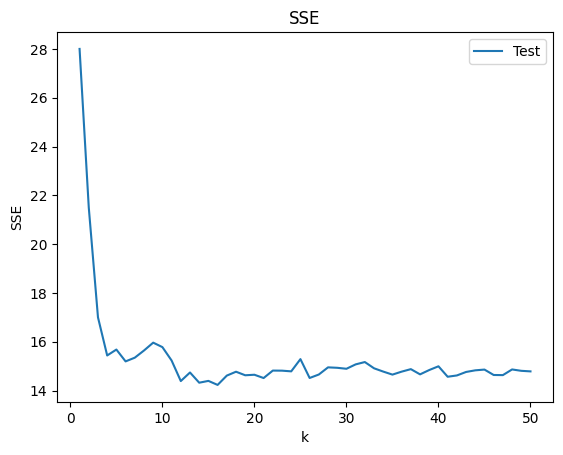

In [49]:
# kNN 
k_bar=50

SSE = [] # We'll store the SSE here 
for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(Xb_train,yb_train) # Train the model on our data
    yb_hat = fitted_model.predict(Xb_test) # Predict values for test set
    SSE.append(np.sum( (yb_test-yb_hat)**2 )) # Save the computed SSE for test set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)
plt.plot(np.arange(1,k_bar+1),SSE,label='Test') # Plot SSE by k

plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

In [50]:
# seems like using only binary variables had a negligible effect on the SSE! 
# so i guess those first three variables we used truly were insufficient and...
# ...it wasn't just because they were binary variables. 

*"Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs?"*

The model with the *lowest* sum of squared errors was the one where I'd removed five variables from our original feature matrix (the feature matrix with all variables except the target variable). When I'd accounted for five or six variables (or all of the variables), I'd get an SSE of around 14 when k was around 10, but when I'd accounted for eight, I'd have an SSE of around 16 at that point. 

To determine what top variables I'd actually like to use in a predictive model, I should perform PCA on the dataset and pick out perhaps six factors that account for the highest explained variance. Out of the models that I tested in this codebook (I can't be bothered to do PCA when I'm on a deadline), I'd pick the model that I trained with X3, which used six variables. 

*"If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings."*

When using only three variables, the SSE of our ideal model was ridiculously high at over 350; when using five or more variables, on the other hand, the SSE of the ideal models was around 14-16. See the answer to the previous question for more insight. 

Using more variables is not necessarily better; introducing certain variables apparently makes predictions a little muddier, as the relationship between SSE and quantity of variables was not always negative (in plain english: more variables did not necessarily mean lower SSE). Additionally, the more variables used, the more of a diminishing return they offered to the preciseness of our models. In the real world, one may run a model that takes billions of parameters as input - like the LLMs we discussed in class - so utilising every single variable would also be horrendously inefficient and wasteful. 

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.